In [3]:
import os

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from scipy.ndimage import rotate
from proximal_sti.lib.QsmEvaluationToolkit import qsm_psnr, qsm_ssim

oj = os.path.join

AttributeError: module 'numpy.random' has no attribute 'mtrand'

In [ ]:
data_root = '/cis/home/sorenst3/my_documents/unsup_moi/data'
save_dir = '/cis/home/sorenst3/my_documents/unsup_moi/save_dir'

/cis/home/sorenst3/my_documents/unsup_moi/proximal_sti/lib/QsmEvaluationToolkit.py:42: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value = ssim(new_gt, new_input, multichannel=True, data_range=1, gaussian_weights=True, sigma=1.5, use_sample_covariance=False)


/cis/home/sorenst3/my_documents/unsup_moi/save_dir/moi_un_ds1bio_v36_tds2_sgd1e3/test_sub104_ori2_xhat.nii.gz
0.0009135321749835477 0.023368767827370903


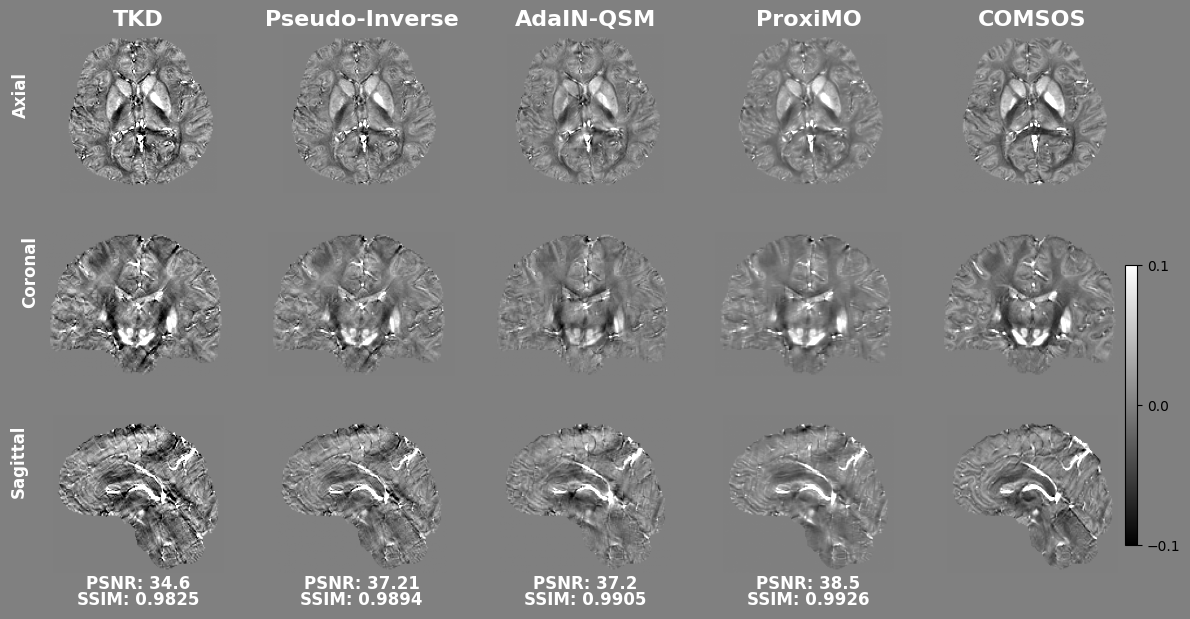

/cis/home/sorenst3/my_documents/unsup_moi/save_dir/moi_un_ds1bio_v36_tds2_sgd1e3/res_unsup_sub104_ori2.png


In [ ]:
# experiment = 'moi_un_ds1_v36_tds2_sgd1e3'
experiment_bio = 'moi_un_ds1bio_v36_tds2_sgd1e3'
sub = 104
ori = 2
has_cosmos = True

mask_path = oj(data_root, 'Sub{0:04d}'.format(sub), 'cosmos', 'Sub{0:04d}_mask.nii.gz'.format(sub))
mask = nib.load(mask_path).get_fdata()

if has_cosmos:
    cosmos_path = oj(data_root, 'Sub{0:04d}'.format(sub), 'cosmos', 'Sub{0:04d}_cosmos.nii.gz'.format(sub))
    cosmos = nib.load(cosmos_path).get_fdata()
    cosmos *= mask
    cosmos_axial = rotate(cosmos[:, :, cosmos.shape[2] // 2], angle=270)
    cosmos_coronal = rotate(cosmos[:, cosmos.shape[1] // 2, :], angle=90)
    cosmos_sagittal = rotate(cosmos[cosmos.shape[0] // 2, :, :], angle=90)

tkd_path = oj(data_root, 'Sub{0:04d}'.format(sub), f'ori{ori}', 'Sub{0:04d}_ori{1}_tkd.nii.gz'.format(sub, ori))
tkd = nib.load(tkd_path).get_fdata()
tkd *= mask
tkd_axial = rotate(tkd[:, :, tkd.shape[-1] // 2], angle=270)
tkd_coronal = rotate(tkd[:, tkd.shape[1] // 2, :], angle=90)
tkd_sagittal = rotate(tkd[tkd.shape[0] // 2, :, :], angle=90)
if has_cosmos:
    tkd_psnr = np.round(qsm_psnr(cosmos, tkd, mask, subtract_mean=False), decimals=2)
    tkd_ssim = np.round(qsm_ssim(cosmos, tkd), decimals=4)

pinv_path = oj(save_dir, experiment_bio, f'test_sub{sub}_ori{ori}_xpinv.nii.gz')
pinv = nib.load(pinv_path).get_fdata()
pinv *= mask
pinv_axial = rotate(pinv[:, :, pinv.shape[-1] // 2], angle=270)
pinv_coronal = rotate(pinv[:, pinv.shape[1] // 2, :], angle=90)
pinv_sagittal = rotate(pinv[pinv.shape[0] // 2, :, :], angle=90)
if has_cosmos:
    pinv_psnr = np.round(qsm_psnr(cosmos, pinv, mask, subtract_mean=False), decimals=2)
    pinv_ssim = np.round(qsm_ssim(cosmos, pinv), decimals=4)

adain_exp = 'unet_adain_noltv_bio_aug_zf'
adain_path = oj(save_dir, adain_exp, f'test_sub{sub}_ori{ori}_whole_xhat.nii.gz')
adain = nib.load(adain_path).get_fdata()
adain *= mask
adain_axial = rotate(adain[:, :, adain.shape[2] // 2], angle=270)
adain_coronal = rotate(adain[:, adain.shape[1] // 2, :], angle=90)
adain_sagittal = rotate(adain[adain.shape[0] // 2, :, :], angle=90)
if has_cosmos:
    adain_psnr = np.round(qsm_psnr(cosmos, adain, mask, subtract_mean=False), decimals=2)
    adain_ssim = np.round(qsm_ssim(cosmos, adain), decimals=4)

xhat_bio_path = oj(save_dir, experiment_bio, f'test_sub{sub}_ori{ori}_xhat.nii.gz')
print(xhat_bio_path)
xhat_bio = nib.load(xhat_bio_path).get_fdata()
xhat_bio *= mask
# xhat_bio_std = np.std(xhat_bio[mask == 1])
# xhat_bio[mask == 1] /= (xhat_bio_std / 0.02926)
# xhat_bio_mean = np.mean(xhat_bio[mask == 1])
# xhat_bio[mask == 1] = xhat_bio[mask == 1] - xhat_bio_mean + (-0.00117)
print(xhat_bio[mask == 1].mean(), xhat_bio[mask == 1].std())
xhat_bio_axial = rotate(xhat_bio[:, :, xhat_bio.shape[2] // 2], angle=270)
xhat_bio_coronal = rotate(xhat_bio[:, xhat_bio.shape[1] // 2, :], angle=90)
xhat_bio_sagittal = rotate(xhat_bio[xhat_bio.shape[0] // 2, :, :], angle=90)
if has_cosmos:
    xhat_bio_psnr = np.round(qsm_psnr(cosmos, xhat_bio, mask, subtract_mean=False), decimals=2)
    xhat_bio_ssim = np.round(qsm_ssim(cosmos, xhat_bio), decimals=4)

axial = [tkd_axial[55:-55, 40:-40], pinv_axial[55:-55, 40:-40], adain_axial[55:-55, 40:-40], xhat_bio_axial[55:-55, 40:-40]]
if has_cosmos:
    axial.append(cosmos_axial[55:-55, 40:-40])

coronal = [tkd_coronal[25:-40, 40:-40], pinv_coronal[25:-40, 40:-40], adain_coronal[25:-40, 40:-40], xhat_bio_coronal[25:-40, 40:-40]]
if has_cosmos:
    coronal.append(cosmos_coronal[25:-40, 40:-40])

sagittal = [tkd_sagittal[20:-20, 55:-55], pinv_sagittal[20:-20, 55:-55], adain_sagittal[20:-20, 55:-55], xhat_bio_sagittal[20:-20, 55:-55]]
if has_cosmos:
    sagittal.append(cosmos_sagittal[20:-20, 55:-55])

plane_views = [axial, coronal, sagittal]
plane_names = ['Axial', 'Coronal', 'Sagittal']

methods = ['TKD', 'Pseudo-Inverse', 'AdaIN-QSM', 'ProxiMO']
if has_cosmos:
        methods.append('COMSOS')
psnr_metrics = [tkd_psnr, pinv_psnr, adain_psnr, xhat_bio_psnr]
ssim_metrics = [tkd_ssim, pinv_ssim, adain_ssim, xhat_bio_ssim]
if has_cosmos:
    psnr_metrics.append('')

fig, ax = plt.subplots(len(plane_views), len(plane_views[0]), facecolor='gray', figsize = (12, 7))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
[ax[i, j].axis('off') for i in range(len(plane_views)) for j in range(len(plane_views[0]))]

plane_name_loc = [-0.25, -0.08, -0.2]
for i in range(len(plane_views)):
    for j in range(len(plane_views[0])):
        im = ax[i, j].imshow(plane_views[i][j], cmap='gray', vmin=-0.1, vmax=0.1)
        
    # plane 
    ax[i, 0].text(plane_name_loc[i], 0.5, f'{plane_names[i]}', color='white', rotation='vertical',
                  size=12, ha="center", transform=ax[i, 0].transAxes, weight='bold')

for j in range(len(plane_views[0])):
    # method
    ax[0, j].set_title(f'{methods[j]}', color='white', weight='bold', size=16)
    # PSNR
    ax[-1, j].text(0.5, -0.1, f'PSNR: {psnr_metrics[j]}' if j < len(psnr_metrics) - 1 else '', color='white', 
        size=12, ha="center", transform=ax[-1, j].transAxes, weight='bold')
    ax[-1, j].text(0.5, -0.2, f'SSIM: {ssim_metrics[j]}' if j < len(psnr_metrics) - 1 else '', color='white', 
        size=12, ha="center", transform=ax[-1, j].transAxes, weight='bold')


fig.subplots_adjust(left=0.05, right=0.95)
cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_ticks([-0.1, 0, 0.1])
plt.savefig(oj(save_dir, experiment_bio, f'res_unsup_sub{sub}_ori{ori}.png'), dpi=800)
plt.show()
print(oj(save_dir, experiment_bio, f'res_unsup_sub{sub}_ori{ori}.png'))


0.0032858486734102937 0.00901947577547853
2.0000417713575868e-99 0.25269489735364925
-0.0011700000000000011 0.029259999999999987
0.003338267805277649 0.009176804232434041
2.1295668876233005e-99 0.238758100631855


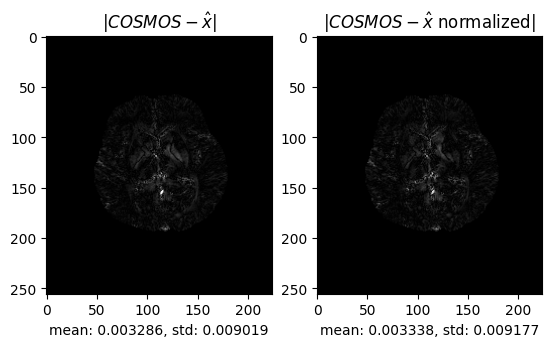

In [5]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(np.abs(cosmos_axial - xhat_bio_axial), cmap='gray', vmin=0, vmax=0.25)
ax[0].set_title('$|COSMOS-\hat{x}|$')
ax[0].set_xlabel(f'mean: {np.round(np.abs(cosmos_axial - xhat_bio_axial).mean(), decimals=6)}, std: {np.round(np.abs(cosmos_axial - xhat_bio_axial).std(), decimals=6)}')
print(np.abs(cosmos_axial - xhat_bio_axial).mean(), np.abs(cosmos_axial - xhat_bio_axial).std())
print(np.abs(cosmos_axial - xhat_bio_axial).min(), np.abs(cosmos_axial - xhat_bio_axial).max())

xhat_bio_std = np.std(xhat_bio[mask == 1])
xhat_bio_norm = xhat_bio.copy()
xhat_bio_norm[mask == 1] = xhat_bio[mask == 1] / (xhat_bio_std / 0.02926)
xhat_bio_mean = np.mean(xhat_bio_norm[mask == 1])
xhat_bio_norm[mask == 1] = xhat_bio_norm[mask == 1] - xhat_bio_mean + (-0.00117)
xhat_bio_axial = rotate(xhat_bio_norm[:, :, xhat_bio_norm.shape[2] // 2], angle=270)
print(xhat_bio_norm[mask == 1].mean(), xhat_bio_norm[mask == 1].std())
ax[1].imshow(np.abs(cosmos_axial - xhat_bio_axial), cmap='gray', vmin=0, vmax=0.25)
ax[1].set_title('$|COSMOS-\hat{x}$ normalized|')
ax[1].set_xlabel(f'mean: {np.round(np.abs(cosmos_axial - xhat_bio_axial).mean(), decimals=6)}, std: {np.round(np.abs(cosmos_axial - xhat_bio_axial).std(), decimals=6)}')

print(np.abs(cosmos_axial - xhat_bio_axial).mean(), np.abs(cosmos_axial - xhat_bio_axial).std())
print(np.abs(cosmos_axial - xhat_bio_axial).min(), np.abs(cosmos_axial - xhat_bio_axial).max())

In [6]:
from skimage.metrics import peak_signal_noise_ratio
mask_axial = rotate(mask[:, :, mask.shape[2] // 2], angle=270)
max_val = 0.60784858
min_val = -0.8570962
print(peak_signal_noise_ratio(cosmos_axial[mask_axial==1], xhat_bio_axial[mask_axial==1], data_range=max_val-min_val))

xhat_bio_std = np.std(xhat_bio[mask == 1])
xhat_bio_norm = xhat_bio.copy()
xhat_bio_norm[mask == 1] = xhat_bio[mask == 1] / (xhat_bio_std / 0.02926)
xhat_bio_mean = np.mean(xhat_bio_norm[mask == 1])
xhat_bio_norm[mask == 1] = xhat_bio_norm[mask == 1] - xhat_bio_mean + (-0.00117)
xhat_bio_axial = rotate(xhat_bio_norm[:, :, xhat_bio_norm.shape[2] // 2], angle=270)

print(peak_signal_noise_ratio(cosmos_axial[mask_axial==1], xhat_bio_axial[mask_axial==1], data_range=max_val-min_val))


38.11689227939435
38.11689227939435


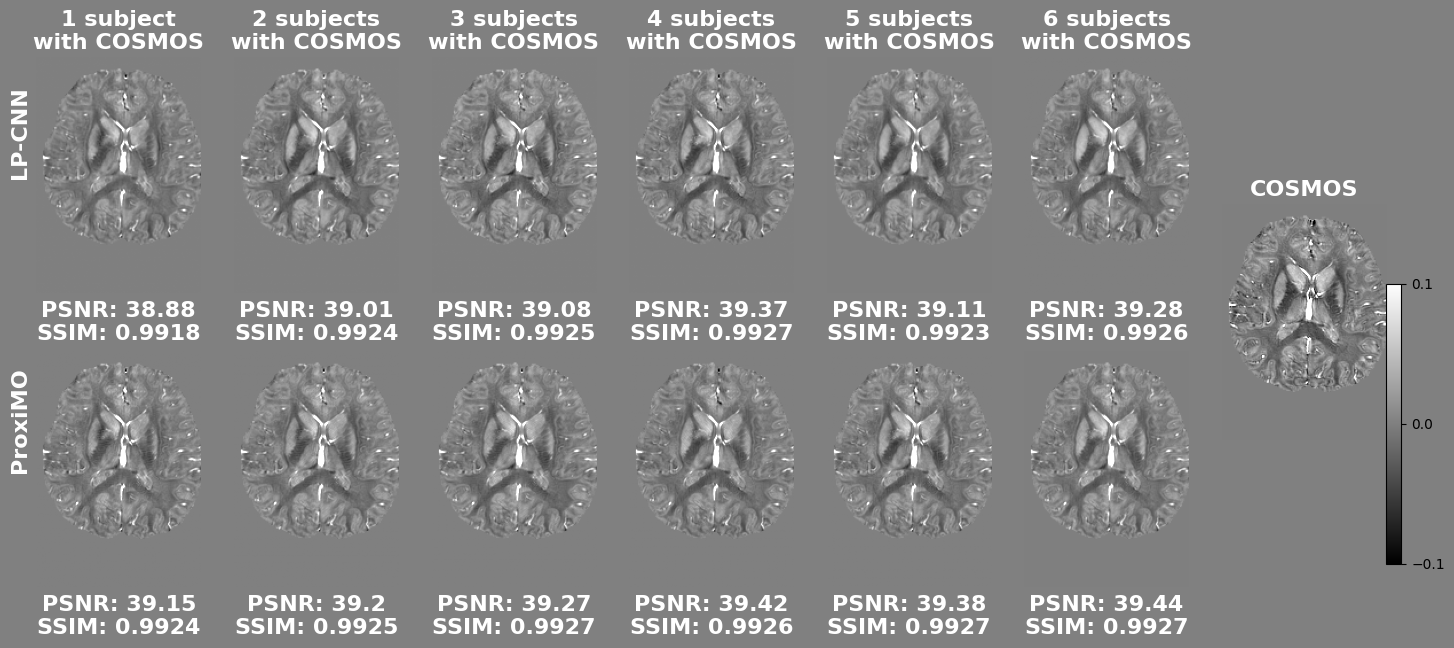

In [7]:
sub = 109
ori = 1
exps_lpcnn = ['lpcnn_reg2', 'lpcnn_reg25', 'lpcnn_reg258', 'lpcnn_reg1289', 'lpcnn_reg12459', 
              'lpcnn_attempt_all']
exps_moi = ['moi_semi2_sel36_old', 'moi_semi25_g056', 'moi_semi258_g062', 'moi_semi1489_g068', 
            'moi_semi12458_g074', 'moi_semi_all_g08']

mask_path = oj(data_root, 'Sub{0:04d}'.format(sub), 'cosmos', 'Sub{0:04d}_mask.nii.gz'.format(sub))
mask = nib.load(mask_path).get_fdata()

cosmos_path = oj(data_root, 'Sub{0:04d}'.format(sub), 'cosmos', 'Sub{0:04d}_cosmos.nii.gz'.format(sub))
cosmos = nib.load(cosmos_path).get_fdata()
cosmos *= mask
cosmos2d = rotate(cosmos[:, :, cosmos.shape[2] // 2], angle=270)

lpcnn_views = []
moi_views = []

lpcnn_psnrs, lpcnn_ssims = [], []
moi_psnrs, moi_ssims = [], []

for exp in exps_lpcnn:
    lpcnn_path = oj(save_dir, exp, f'test_sub{sub}_ori{ori}_xhat.nii.gz')
    xhat_lpcnn = nib.load(lpcnn_path).get_fdata()
    xhat_lpcnn *= mask
    xhat_psnr = np.round(qsm_psnr(cosmos, xhat_lpcnn, mask, subtract_mean=False), decimals=2)
    xhat_ssim = np.round(qsm_ssim(cosmos, xhat_lpcnn), decimals=4)
    xhat_lpcnn2d = rotate(xhat_lpcnn[:, :, xhat_lpcnn.shape[2] // 2], angle=270)
    lpcnn_views.append(xhat_lpcnn2d[30:-20, 40:-40])
    lpcnn_psnrs.append(xhat_psnr)
    lpcnn_ssims.append(xhat_ssim)

for exp in exps_moi:
    moi_path = oj(save_dir, exp, f'test_sub{sub}_ori{ori}_xhat.nii.gz')
    xhat_moi = nib.load(moi_path).get_fdata()
    xhat_moi *= mask
    xhat_psnr = np.round(qsm_psnr(cosmos, xhat_moi, mask, subtract_mean=False), decimals=2)
    xhat_ssim = np.round(qsm_ssim(cosmos, xhat_moi), decimals=4)
    xhat_moi2d = rotate(xhat_moi[:, :, xhat_moi.shape[2] // 2], angle=270)
    moi_views.append(xhat_moi2d[30:-20, 40:-40])
    moi_psnrs.append(xhat_psnr)
    moi_ssims.append(xhat_ssim)

plane_views = [lpcnn_views, moi_views]
psnrs = [lpcnn_psnrs, moi_psnrs]
ssims = [lpcnn_ssims, moi_ssims]

methods = ['LP-CNN', 'ProxiMO']

fig, ax = plt.subplots(2, 7, facecolor='gray', figsize = (15, 7))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
[ax[i, j].axis('off') for i in range(2) for j in range(7)]

for i in range(2):
    for j in range(len(exps_moi)):
        im = ax[i, j].imshow(plane_views[i][j], cmap='gray', vmin=-0.1, vmax=0.1)
        ax[0, j].set_title(f'{j+1} subject{"s" if j > 0 else ""}\nwith COSMOS', color='white', weight='bold', size=16)
        ax[i, j].text(0.5, -0.1, f'PSNR: {psnrs[i][j]}', color='white', 
                       size=16, ha="center", transform=ax[i, j].transAxes, weight='bold')
        ax[i, j].text(0.5, -0.2, f'SSIM: {ssims[i][j]}', color='white', 
                       size=16, ha="center", transform=ax[i, j].transAxes, weight='bold')
    
    ax[i, 0].text(-0.1, 0.5, f'{methods[i]}', color='white', rotation='vertical',
                  size=16, ha="center", transform=ax[i, 0].transAxes, weight='bold')

gs = ax[0, 6].get_gridspec()
axbig = fig.add_subplot(gs[0:, 6])
axbig.imshow(cosmos2d[30:-20, 40:-40], cmap='gray', vmin=-0.1, vmax=0.1)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
axbig.axis('off')
axbig.set_title('COSMOS', color='white', weight='bold', size=16)

fig.subplots_adjust(left=0.05, right=0.95)
cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_ticks([-0.1, 0, 0.1])
plt.savefig(oj(save_dir, experiment_bio, f'res_semi_sup_sub{sub}_ori{ori}.png'), dpi=1000)

[-0.0011700000000000005, -0.0011700000000000011, -0.0011699999999999992, -0.001170000000000001, -0.0011700000000000007, -0.0011700000000000005, -0.0011700000000000005, -0.0011700000000000002, -0.0011700000000000013, -0.0011700000000000005, -0.0011700000000000005, -0.0011699999999999998] [0.02926000000000001, 0.029260000000000008, 0.02925999999999998, 0.029259999999999984, 0.02926000000000001, 0.029259999999999994, 0.02925999999999999, 0.02926, 0.029259999999999994, 0.029259999999999998, 0.029260000000000008, 0.02926]


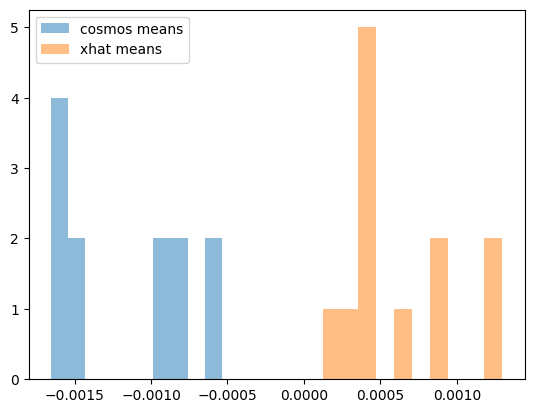

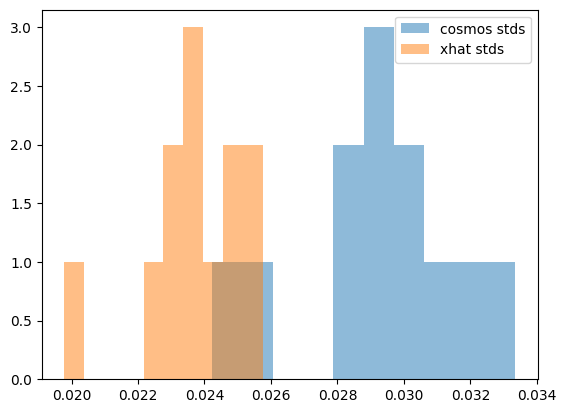

-0.0011721796386827297 0.000624436985247236
0.02926120399431262 0.023725277790905806


In [8]:
subs = np.arange(101, 113)
# subs = [1,2,3,4,5,6,8,9]
experiment = 'moi_un_ds1bio_v36_tds2_sgd1e3'

cos_mean = -0.00117
cos_std = 0.02926

cos_means, cos_stds = [], []
xhat_means, xhat_stds = [], []
xhat_means2, xhat_stds2 = [], []
for sub in subs:
    cosmos_path = oj(data_root, 'Sub{0:04d}'.format(sub), 'cosmos', 'Sub{0:04d}_cosmos.nii.gz'.format(sub))
    cosmos = nib.load(cosmos_path).get_fdata()

    mask_path = oj(data_root, 'Sub{0:04d}'.format(sub), 'cosmos', 'Sub{0:04d}_mask.nii.gz'.format(sub))
    mask = nib.load(mask_path).get_fdata()
    cosmos *= mask
    
    cos_means.append(cosmos[mask == 1].mean())
    cos_stds.append(cosmos[mask == 1].std())

    xhat_path = oj(save_dir, experiment, f'test_sub{sub}_ori{ori}_xhat.nii.gz')
    xhat = nib.load(xhat_path).get_fdata()
    xhat *= mask
    # xhat_psnr = np.round(qsm_psnr(cosmos, xhat, mask, subtract_mean=False), decimals=2)
    xhat_means.append(xhat[mask==1].mean())
    xhat_stds.append(xhat[mask==1].std())

    xhat_std = np.std(xhat[mask == 1])
    xhat[mask == 1] /= (xhat_std / 0.02926)
    xhat_mean = np.mean(xhat[mask == 1])
    xhat[mask == 1] = xhat[mask == 1] - xhat_mean + (-0.00117) 
    xhat_means2.append(xhat[mask==1].mean())
    xhat_stds2.append(xhat[mask==1].std())
print(xhat_means2, xhat_stds2)



# print(cos_means)
plt.hist(cos_means, alpha=0.5, label='cosmos means')
plt.hist(xhat_means, alpha=0.5, label='xhat means')
# plt.hist(xhat_means2, alpha=0.5, label='xhat means normalized')
plt.legend()
plt.show()

# print(cos_stds)
plt.hist(cos_stds, alpha=0.5, label='cosmos stds')
plt.hist(xhat_stds, alpha=0.5, label='xhat stds')
# plt.hist(xhat_stds2, alpha=0.5, label='xhat stds normalized')
plt.legend()
plt.show()

print(np.mean(cos_means), np.mean(xhat_means))
# print(np.mean(xhat_means2), np.mean(xhat_means2))
print(np.mean(cos_stds), np.mean(xhat_stds))

In [9]:
# subs = np.arange(101, 113)
subs = [1,2,4,5,8,9]

# cos_mean = -0.00117
# cos_std = 0.02926

cos_means, cos_stds = [], []
# xhat_means, xhat_stds = [], []
# xhat_means2, xhat_stds2 = [], []
for sub in subs:
    cosmos_path = oj(data_root, 'Sub{0:04d}'.format(sub), 'cosmos', 'Sub{0:04d}_cosmos.nii.gz'.format(sub))
    cosmos = nib.load(cosmos_path).get_fdata()

    mask_path = oj(data_root, 'Sub{0:04d}'.format(sub), 'cosmos', 'Sub{0:04d}_mask.nii.gz'.format(sub))
    mask = nib.load(mask_path).get_fdata()
    cosmos *= mask
    
    cos_means.append(cosmos[mask == 1].mean())
    cos_stds.append(cosmos[mask == 1].std())


print(np.mean(cos_means), np.mean(cos_stds))

saved_mean = np.load(oj(data_root, 'train_gt_mean_whole.npy'))
saved_std = np.load(oj(data_root, 'train_gt_std_whole.npy'))
print(saved_mean, saved_std)

-0.00028766496966350506 0.028389566319714052
-0.00024724603240382513 0.028365555003933052
